In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

dataset = pd.read_csv(r'C:\Users\user\Desktop\자료\0실습\[유비온]해커톤-신용카드 사기\140472_store_credit_card_revenue_data\funda_train.csv')

In [3]:
dataset['amount_small'] = dataset['amount']/1000000 #sum 할 시 값이 커져 십만 기준
dataset

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,amount_small
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,0.001857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,0.000857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,0.002000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,0.007857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,0.002000
...,...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000,-0.004500
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143,0.004143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000,0.004500
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571,0.000571


In [19]:
#날짜 확인 16.06~19.02 코로나 이전의 매출
dataset['transacted_date'].sort_values()

0          2016-06-01
3972143    2016-06-01
3972142    2016-06-01
3955809    2016-06-01
3955808    2016-06-01
              ...    
1927409    2019-02-28
1927408    2019-02-28
1927407    2019-02-28
1908774    2019-02-28
6556612    2019-02-28
Name: transacted_date, Length: 6556613, dtype: object

In [4]:
dataset.isna().sum() #결측치 확인

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
amount_small              0
dtype: int64

In [5]:
dataset.isin([0]).sum() #데이터에 0으로 입력된 값 확인

store_id               4481
card_id                   5
card_company              0
transacted_date           0
transacted_time           0
installment_term    6327632
region                    0
type_of_business          0
amount                   80
amount_small             80
dtype: int64

In [6]:
dataset['region'] = dataset['region'].fillna('지역 모름') #결측치 대체
dataset['type_of_business'] = dataset['type_of_business'].fillna('업종 모름')
dataset.isna().sum() # 결측지가 잘 대체됐는지 확인

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
amount_small        0
dtype: int64

In [7]:
#비즈니스 타입 별 금액 확인 sum시 환불금액은 자연스럽게 빠지기때문에 (+금액, -금액) 조정하지않음
a = dataset['amount_small'].groupby(dataset['type_of_business'])
print(a.sum().sort_values(ascending=False))


type_of_business
업종 모름                 39488.749497
한식 음식점업                4810.450168
의복 소매업                 2403.673998
의약품 도매업                1568.540161
일반 교과 학원               1293.610831
                          ...     
예술품 및 골동품 소매업             3.172929
채소, 과실 및 뿌리작물 소매업         2.532857
곡물 및 기타 식량작물 재배업          1.972814
배전반 및 전기 자동제어반 제조업        1.635599
신선식품 및 단순 가공식품 도매업        0.506327
Name: amount_small, Length: 146, dtype: float64


In [9]:
#비즈니스 타입 별 결제건수 확인
a.count().sort_values(ascending=False)

type_of_business
업종 모름                       3952609
한식 음식점업                      745905
두발 미용업                       178475
의복 소매업                       158234
기타 주점업                       102413
                             ...   
곡물 및 기타 식량작물 재배업                569
주방용품 및 가정용 유리, 요업 제품 소매업        551
배전반 및 전기 자동제어반 제조업              533
그 외 기타 생활용품 도매업                 519
신선식품 및 단순 가공식품 도매업              231
Name: amount_small, Length: 146, dtype: int64

In [10]:
#datetime 함수 사용하여 시간, 일, 월 칼럼 추가 
dataset['datetime'] = pd.to_datetime(dataset.transacted_date + " " + 
                                dataset.transacted_time, format='%Y-%m-%d %H:%M:%S')

dataset['time'] = dataset['datetime'].dt.time
dataset['day'] = dataset['datetime'].dt.day
dataset['month'] = dataset['datetime'].dt.month

#도(big_region), 시(small_region) 칼럼 추가
dataset['big_region'] = dataset['region'].str[0:2]
dataset['small_region'] = dataset['region'].str[3:]
dataset.head(1)

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,amount_small,datetime,time,day,month,big_region,small_region
0,0,0,b,2016-06-01,13:13,0,지역 모름,기타 미용업,1857.142857,0.001857,2016-06-01 13:13:00,13:13:00,1,6,지역,모름


In [42]:
dataset['big_region'].value_counts()

지역    2042766
경기     968836
서울     704437
경남     406190
부산     359042
경북     262338
충북     239796
충남     217040
대구     208424
인천     192439
강원     169791
전북     143514
대전     142478
울산     124640
전남     121978
광주     118015
제주     114671
세종      20218
Name: big_region, dtype: int64

In [15]:
#1. 지역에 따라 월별 시즈널리티 확인
#지역별 월 결제액 확인 하지만 지역별로 큰 차이 나지않음
#전지역 월 결제액 그래프가 한 캔버스안에 그리는게 가능할지... 
def region_month_sales(region, datetimes): #지역-매출액

    """ parameter
        business_type : data['type_of_business']에 있는 업종명을 넣어주세요.
        datetimes : 셋 중에 하나를 선택하세요. time, day, month 
    """
    
    dataset_ = dataset.loc[(dataset['big_region'] == region), ['amount_small',datetimes]]
    group = dataset_['amount_small'].groupby(dataset_[datetimes]) 

    fig = px.line(group.sum(), title = region + " 월별 매출")
    fig.show()

In [16]:
region_month_sales('강원','month') 

In [20]:
region_month_sales('부산','month') 

In [27]:
region_month_sales('제주','month') 

In [34]:
region_month_sales('경기','month') 

In [35]:
#지역별 월 결제건수 확인 / 결제액과 큰차이 없음
def region_month_counts(region, datetimes): #지역-매출건수

    """ parameter
        business_type : data['type_of_business']에 있는 업종명을 넣어주세요.
        datetimes : 셋 중에 하나를 선택하세요. time, day, month 
    """
    
    dataset_ = dataset.loc[(dataset['big_region'] == region), ['amount_small',datetimes]]
    group = dataset_['amount_small'].groupby(dataset_[datetimes]) 

    fig = px.line(group.count(), title = region + " 월별 매출")
    fig.show()

In [41]:
region_month_counts('충북','month') 

<AxesSubplot:ylabel='type_of_business'>

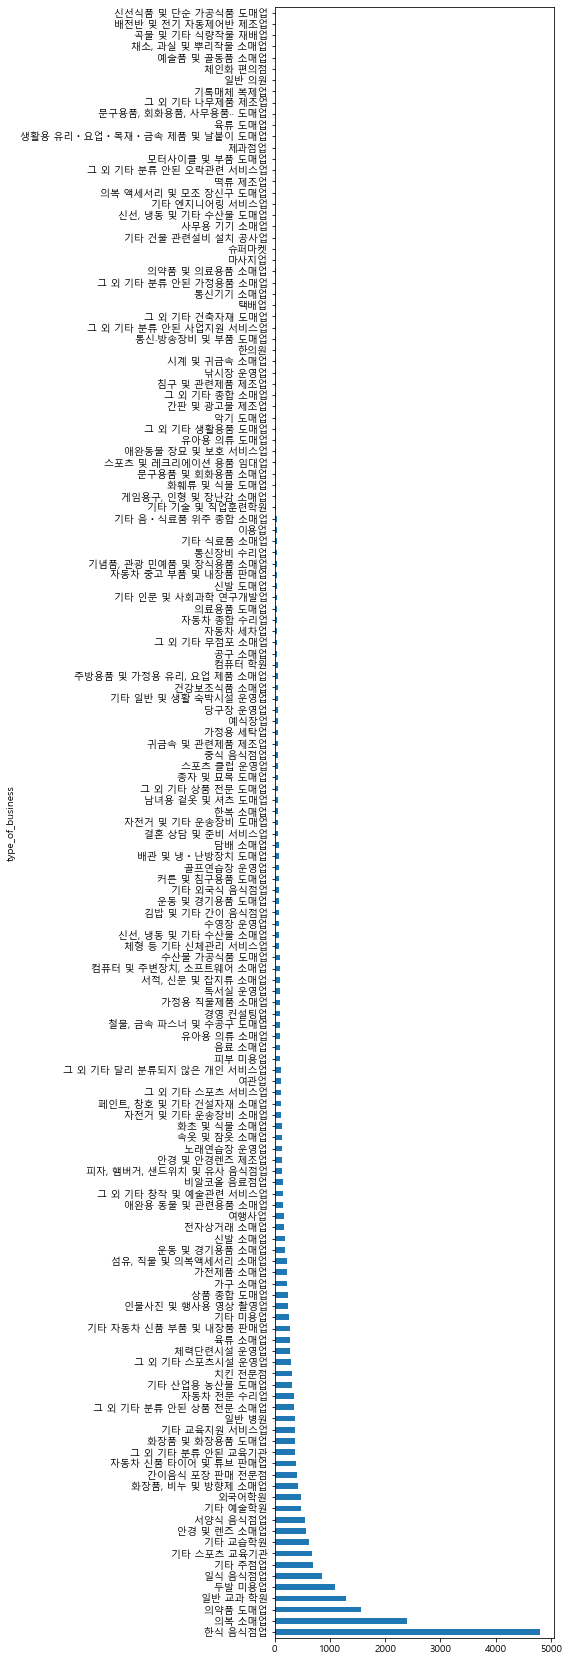

In [60]:
#2. 업종 별 결제액
#대부분 일상과 가까운 업종의 매출액이 크다

#업종모름의 값이 커 drop
a = dataset[dataset['type_of_business'] == '업종 모름'].index
dataset_drop = dataset.drop(a)
dataset_drop

#매출액 큰 업종별 내림차순 
data_type = dataset_drop['amount_small'].groupby(dataset_drop['type_of_business'])
data_type_sum = data_type.sum().sort_values(ascending=False)

#plot 사이즈 크기 조절 및 폰트 지정
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (5,30)
data_type_sum.plot(kind = 'barh')

In [108]:
#업종 별 매출 top5 확인
data_type_sum.head(5)

type_of_business
한식 음식점업     4810.450168
의복 소매업      2403.673998
의약품 도매업     1568.540161
일반 교과 학원    1293.610831
두발 미용업      1087.474652
Name: amount_small, dtype: float64

In [117]:
#업종 별 매출 top5 상세확인
def business_sales(business_type, datetimes): #

    """ parameter
        business_type : dataset['type_of_business']에 있는 업종명을 넣어주세요.
        datetimes : 셋 중에 하나를 선택하세요. time, day, month 
    """
    
    dataset_ = dataset.loc[(dataset['type_of_business'] == business_type), ['amount',datetimes]]
    group = dataset_['amount'].groupby(dataset_[datetimes]) 

    fig = px.line(group.sum(), title = business_type + " 매출")
    fig.show()

In [111]:
business_sales('한식 음식점업', 'time')

In [124]:
#할일1. 할부 많은 업종 알아보기 2.연도별 매출추이 확인

#하고싶은거1. 업종 별 지역 분포 
#전지역 월 결제액 그래프가 한 캔버스안에 그리는게 가능할지... 
dataset['installment_term'].value_counts()

0     6327632
3      134709
2       42101
5       23751
6       10792
10       6241
4        4816
12       2699
60       1290
7         553
8         413
24        404
9         349
18        332
15        130
20        116
80         83
11         47
30         43
36         36
16         23
14         12
63          8
83          6
65          6
19          4
72          4
13          3
35          2
23          2
93          2
82          2
17          1
22          1
Name: installment_term, dtype: int64